# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Import dependencies
import pandas as pd
import json
import requests
from config import api_key
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

## Generate Cities List

In [42]:
#Generate Cities List
#Create random coordinates
lats = np.random.randint(-90, 90, size = 1300)
longs = np.random.randint(-180, 180, size = 1300)

coords_df = pd.DataFrame({"latitude": lats, "longitude": longs})

coords_df

,latitude,longitude
0,-26,-17
1,-9,-93
2,84,-31
3,1,141
4,7,-128
...,...,...
1295,3,-170
1296,-40,-130
1297,26,-108
1298,45,94


In [43]:
#Iterate through citipy to build list
cities = []

for ind, row in coords_df.iterrows():
    lat, longs = row["latitude"], row["longitude"]
    city = citipy.nearest_city(lat, longs).city_name
    
    if city not in cities:
        cities.append(city)
 
len(cities)

557

In [91]:
### Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

#set url and query
cities_s = cities
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and request your results in Celsius

# Get weather data
# set up lists to hold reponse info
name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#set groupings for api calls and log print
count = 0
set_one = 1

print("Beginning Data Retrieval\n-------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = f"{url}appid={api_key}&units={units}&q="
          
    response = requests.get(query_url + city).json()    
    
    try:
#         name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
 
        if count > 50:
            count = 1
            set_one += 1
            name.append(city)
        else:
            count += 1
            name.append(city)
        print(f"Processing Record {count} of Set {set_one} | {city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("--------------------------------\nData Retrieval Complete\n--------------------------------")
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 3 of Set 1 | vanimo
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | gravatai
Processing Record 6 of Set 1 | beidao
Processing Record 7 of Set 1 | margate
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | necochea
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | maldonado
Processing Record 12 of Set 1 | recodo
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | constitucion
City not found. Skipping...
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | honolulu
Processing Record 20 of Set 1 | juybar
Processing Record 21 of Set 1 | lompoc
Processing Record 22 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
#Create dataframe
weather_dict = {"City Name": name, "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed":
    wind_speed, "Country": country, "Date": date}

weather_data = pd.DataFrame(weather_dict)

#Export the dataframe to a CSV

weather_data.to_csv("Weather_data_output.csv")

weather_data


,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,74.52,100,75,6.91,US,1626136351
1,puerto ayora,-0.7393,-90.3518,71.40,79,29,9.86,EC,1626136544
2,vanimo,-2.6741,141.3028,86.04,64,9,7.94,PG,1626136544
3,atuona,-9.8000,-139.0333,77.65,76,32,21.77,PF,1626136545
4,gravatai,-29.9444,-50.9919,64.18,100,83,4.61,BR,1626136545
...,...,...,...,...,...,...,...,...,...
504,gigmoto,13.7796,124.3900,84.83,76,96,3.53,PH,1626136733
505,klaksvik,62.2266,-6.5890,52.72,93,100,0.72,FO,1626136734
506,el banco,9.0011,-73.9758,82.27,69,5,1.05,CO,1626136734
507,ler,8.3018,30.1418,71.69,90,100,3.06,SS,1626136735


In [93]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,5.090000e+02
mean,17.574263,17.890163,69.713084,71.976424,58.913556,7.964145,1.626137e+09
std,33.027232,91.358806,13.965848,18.684056,39.578045,6.007221,1.102227e+02
min,-54.800000,-175.200000,33.400000,11.000000,0.000000,0.000000,1.626136e+09
25%,-9.166700,-61.193600,59.320000,65.000000,19.000000,3.440000,1.626137e+09
50%,20.700000,21.050000,71.350000,75.000000,75.000000,6.690000,1.626137e+09
75%,43.323600,102.173900,80.710000,85.000000,99.000000,11.050000,1.626137e+09
max,78.218600,174.500000,108.430000,100.000000,100.000000,40.290000,1.626137e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [94]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data[weather_data["Humidity"] > 100]

high_humidity

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


The dataset did not contain any cities where the humidity was > 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

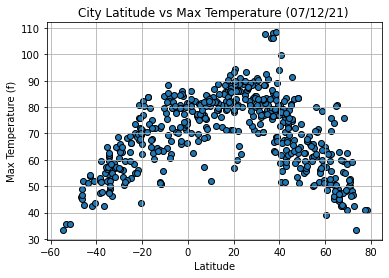

In [96]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black', )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title('City Latitude vs Max Temperature (07/12/21) ')
plt.grid(zorder = 0)

plt.savefig("lat_vs_temp_plot.png")

plt.show()

## Latitude vs. Humidity Plot

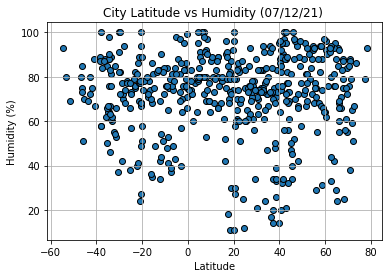

In [97]:
# Create a Scatter Plot for Latitude vs Humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, edgecolor='black', )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (07/12/21) ')
plt.grid(zorder = 0)
#save plot png
plt.savefig("lat_vs_humidity_plot.png")
#show plot
plt.show()

## Latitude vs. Cloudiness Plot

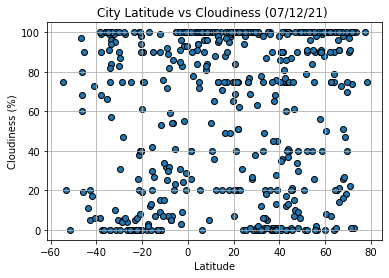

In [98]:
# Create a Scatter Plot for Latitude vs Cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black', )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (07/12/21) ')
plt.grid(zorder = 0)
#save png file
plt.savefig("lat_vs_cloudiness_plot.png")
#show plot
plt.show()

## Latitude vs. Wind Speed Plot

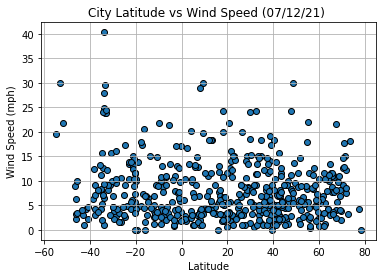

In [99]:
# Create a Scatter Plot for Latitude vs Humidity
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black', )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (07/12/21) ')
plt.grid(zorder = 0)
#save png file
plt.savefig("lat_vs_Wind_plot.png")
#show plot
plt.show()

## Linear Regression

In [100]:
#split dataframe into northern and southern hemispheres
northern = weather_data[weather_data['Lat'] >= 0]                        
southern = weather_data[weather_data['Lat'] <= 0]

#Values for plotting
n_values = northern['Lat']
s_values = southern['Lat']                                          

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.42766164292612846


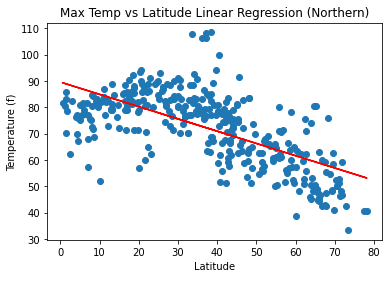

In [113]:
# Add the linear regression equation and line to plot
y_values = northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_values, y_values)
regress_values = n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_values, y_values)
plt.plot(n_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.title('Max Temp vs Latitude Linear Regression (Northern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("max_temp_regression.png")
#show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6005924392711744


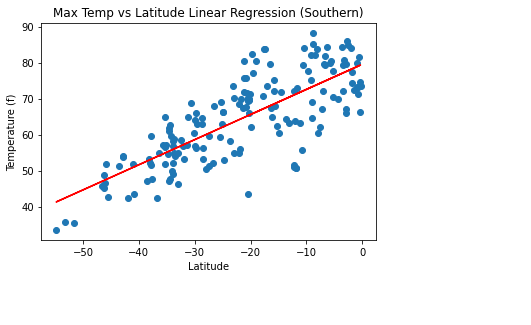

In [114]:
# Add the linear regression equation and line to plot
y_values = southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_values, y_values)
regress_values = s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_values, y_values)
plt.plot(s_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.title('Max Temp vs Latitude Linear Regression (Southern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("s_max_temp_regression.png")
#show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010353228460724991


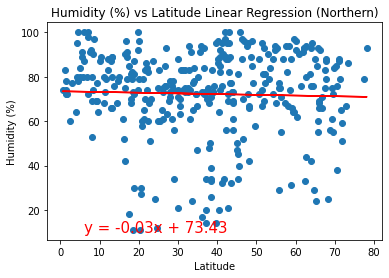

In [115]:
# Add the linear regression equation and line to plot
y_values = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_values, y_values)
regress_values = n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_values, y_values)
plt.plot(n_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude Linear Regression (Northern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("north_humidity_regression.png")
#show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004419022927056472


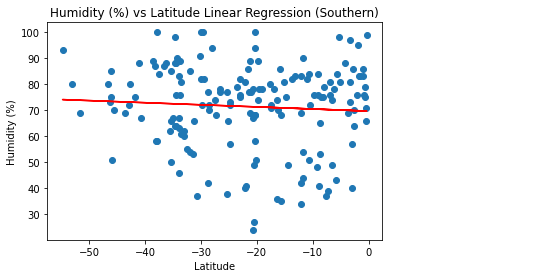

In [116]:
# Add the linear regression equation and line to plot
y_values = southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_values, y_values)
regress_values = s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_values, y_values)
plt.plot(s_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude Linear Regression (Southern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("north_humidity_regression.png")
#show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012808840833218711


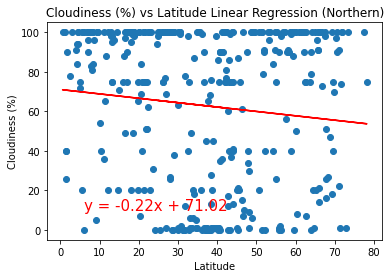

In [117]:
# Add the linear regression equation and line to plot
y_values = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_values, y_values)
regress_values = n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_values, y_values)
plt.plot(n_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude Linear Regression (Northern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("northern_cloudiness_regression.png")
#show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0003119144799411615


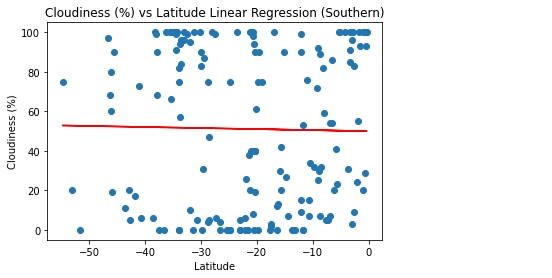

In [118]:
# Add the linear regression equation and line to plot
y_values = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_values, y_values)
regress_values = s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_values, y_values)
plt.plot(s_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude Linear Regression (Southern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("southern_cloudiness_regression.png")
#show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0002487312659181289


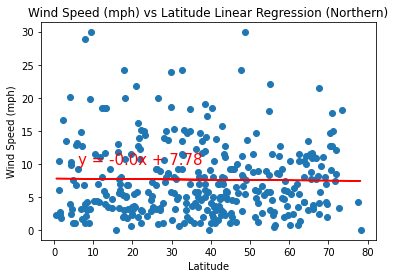

In [119]:
# Add the linear regression equation and line to plot
y_values = northern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_values, y_values)
regress_values = n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_values, y_values)
plt.plot(n_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude Linear Regression (Northern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("northern_wind_regression.png")
#show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03366625757369106


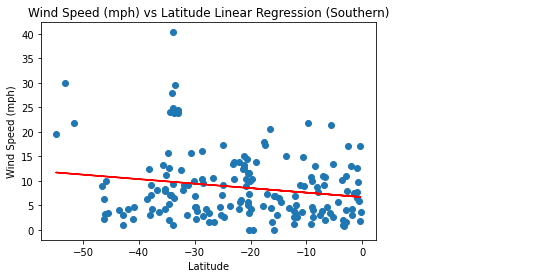

In [120]:
# Add the linear regression equation and line to plot
y_values = southern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_values, y_values)
regress_values = s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_values, y_values)
plt.plot(s_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude Linear Regression (Southern)')
print(f"The r-squared is: {rvalue**2}")

#save png file
plt.savefig("southern_wind_regression.png")
#show plot
plt.show()